In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fao = pd.read_csv('FAO.csv', encoding= 'unicode_escape',index_col='Area')

In [3]:
# 1(a)
overall_annual_food_production = fao.groupby("Area").sum().astype(int)
overall_annual_food_production.to_csv('overall_annual_food_production.csv')

In [4]:
#1(b)
overall_food_production = overall_annual_food_production.sum(axis=1).rename('OPC')

In [5]:
#1(c)
average_food_production = overall_annual_food_production.mean(axis=1).astype(int).rename('APPYPC')

In [6]:
#1(d)
overall_food_production_sum = overall_food_production.sum()
percentage_food_production = overall_food_production.rename('GAPPC')/overall_food_production_sum

In [7]:
overall_and_average_and_percentage_food_production = pd.concat([overall_food_production,
                                                               average_food_production,
                                                               percentage_food_production],
                                                               axis=1)
print(overall_and_average_and_percentage_food_production.head(3).append(overall_and_average_and_percentage_food_production.tail(3)).to_string(formatters={'GAPPC':'{:,.2%}'.format}))

                 OPC  APPYPC GAPPC
Area                              
Afghanistan   689162   13003 0.18%
Albania       237202    4475 0.06%
Algeria      1530613   28879 0.40%
Yemen         459785    8675 0.12%
Zambia        315687    5956 0.08%
Zimbabwe      351093    6624 0.09%


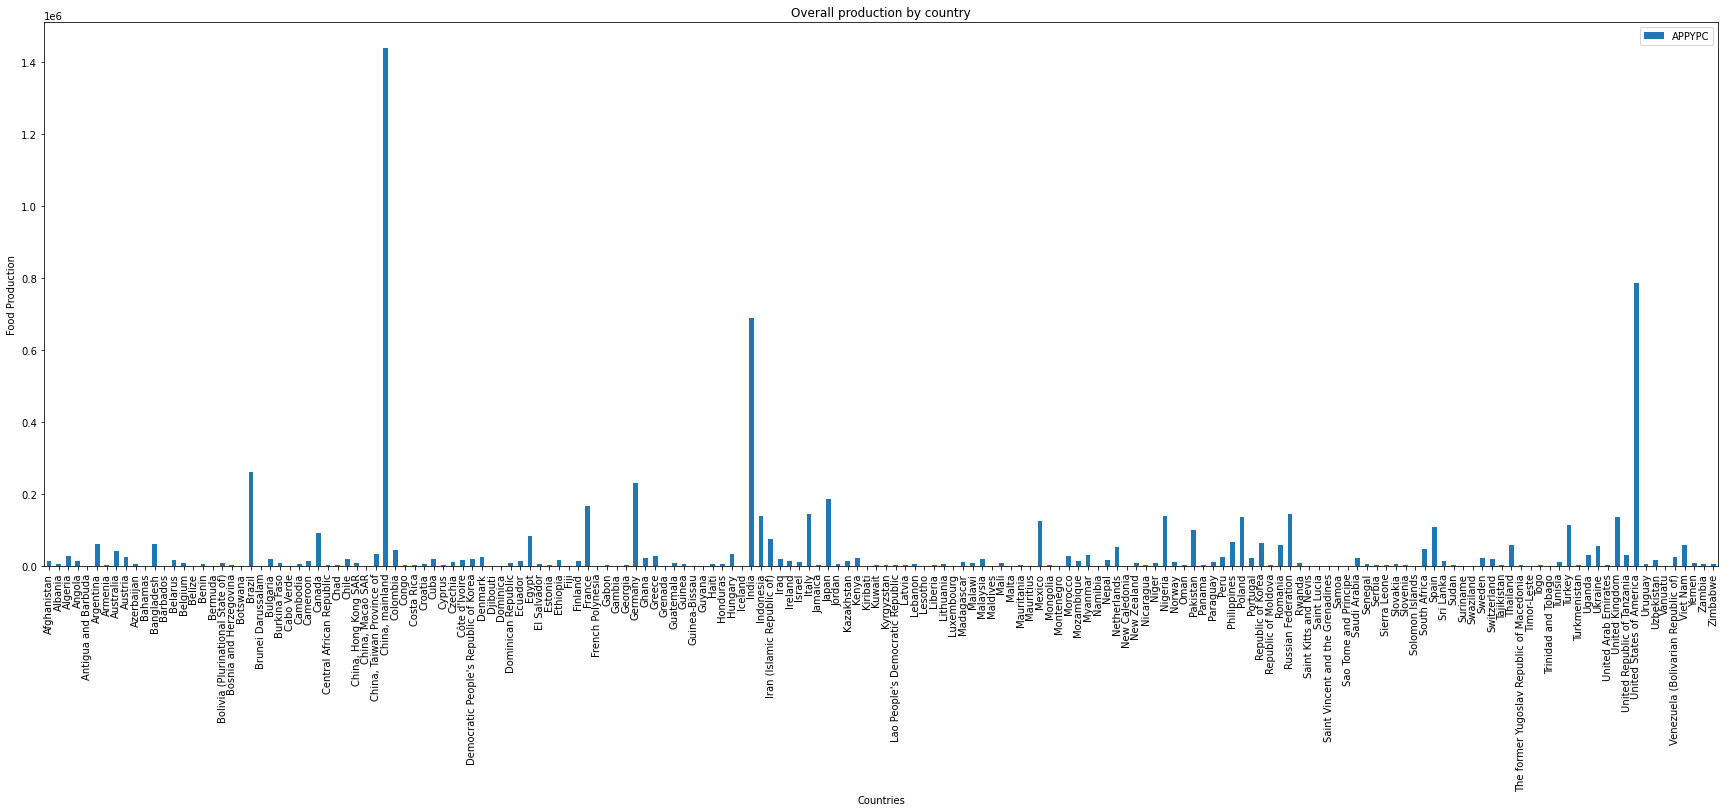

In [8]:
# 2
overall_and_average_and_percentage_food_production['APPYPC'].plot(kind='bar', figsize=(30,10), title='Overall production by country', legend=True)
plt.xlabel('Countries')
plt.ylabel('Food Production')
# max_val = overall_and_average_and_percentage_food_production['APPYPC'].idxmax()
# min_val = overall_and_average_and_percentage_food_production['APPYPC'].idxmin()
plt.show()

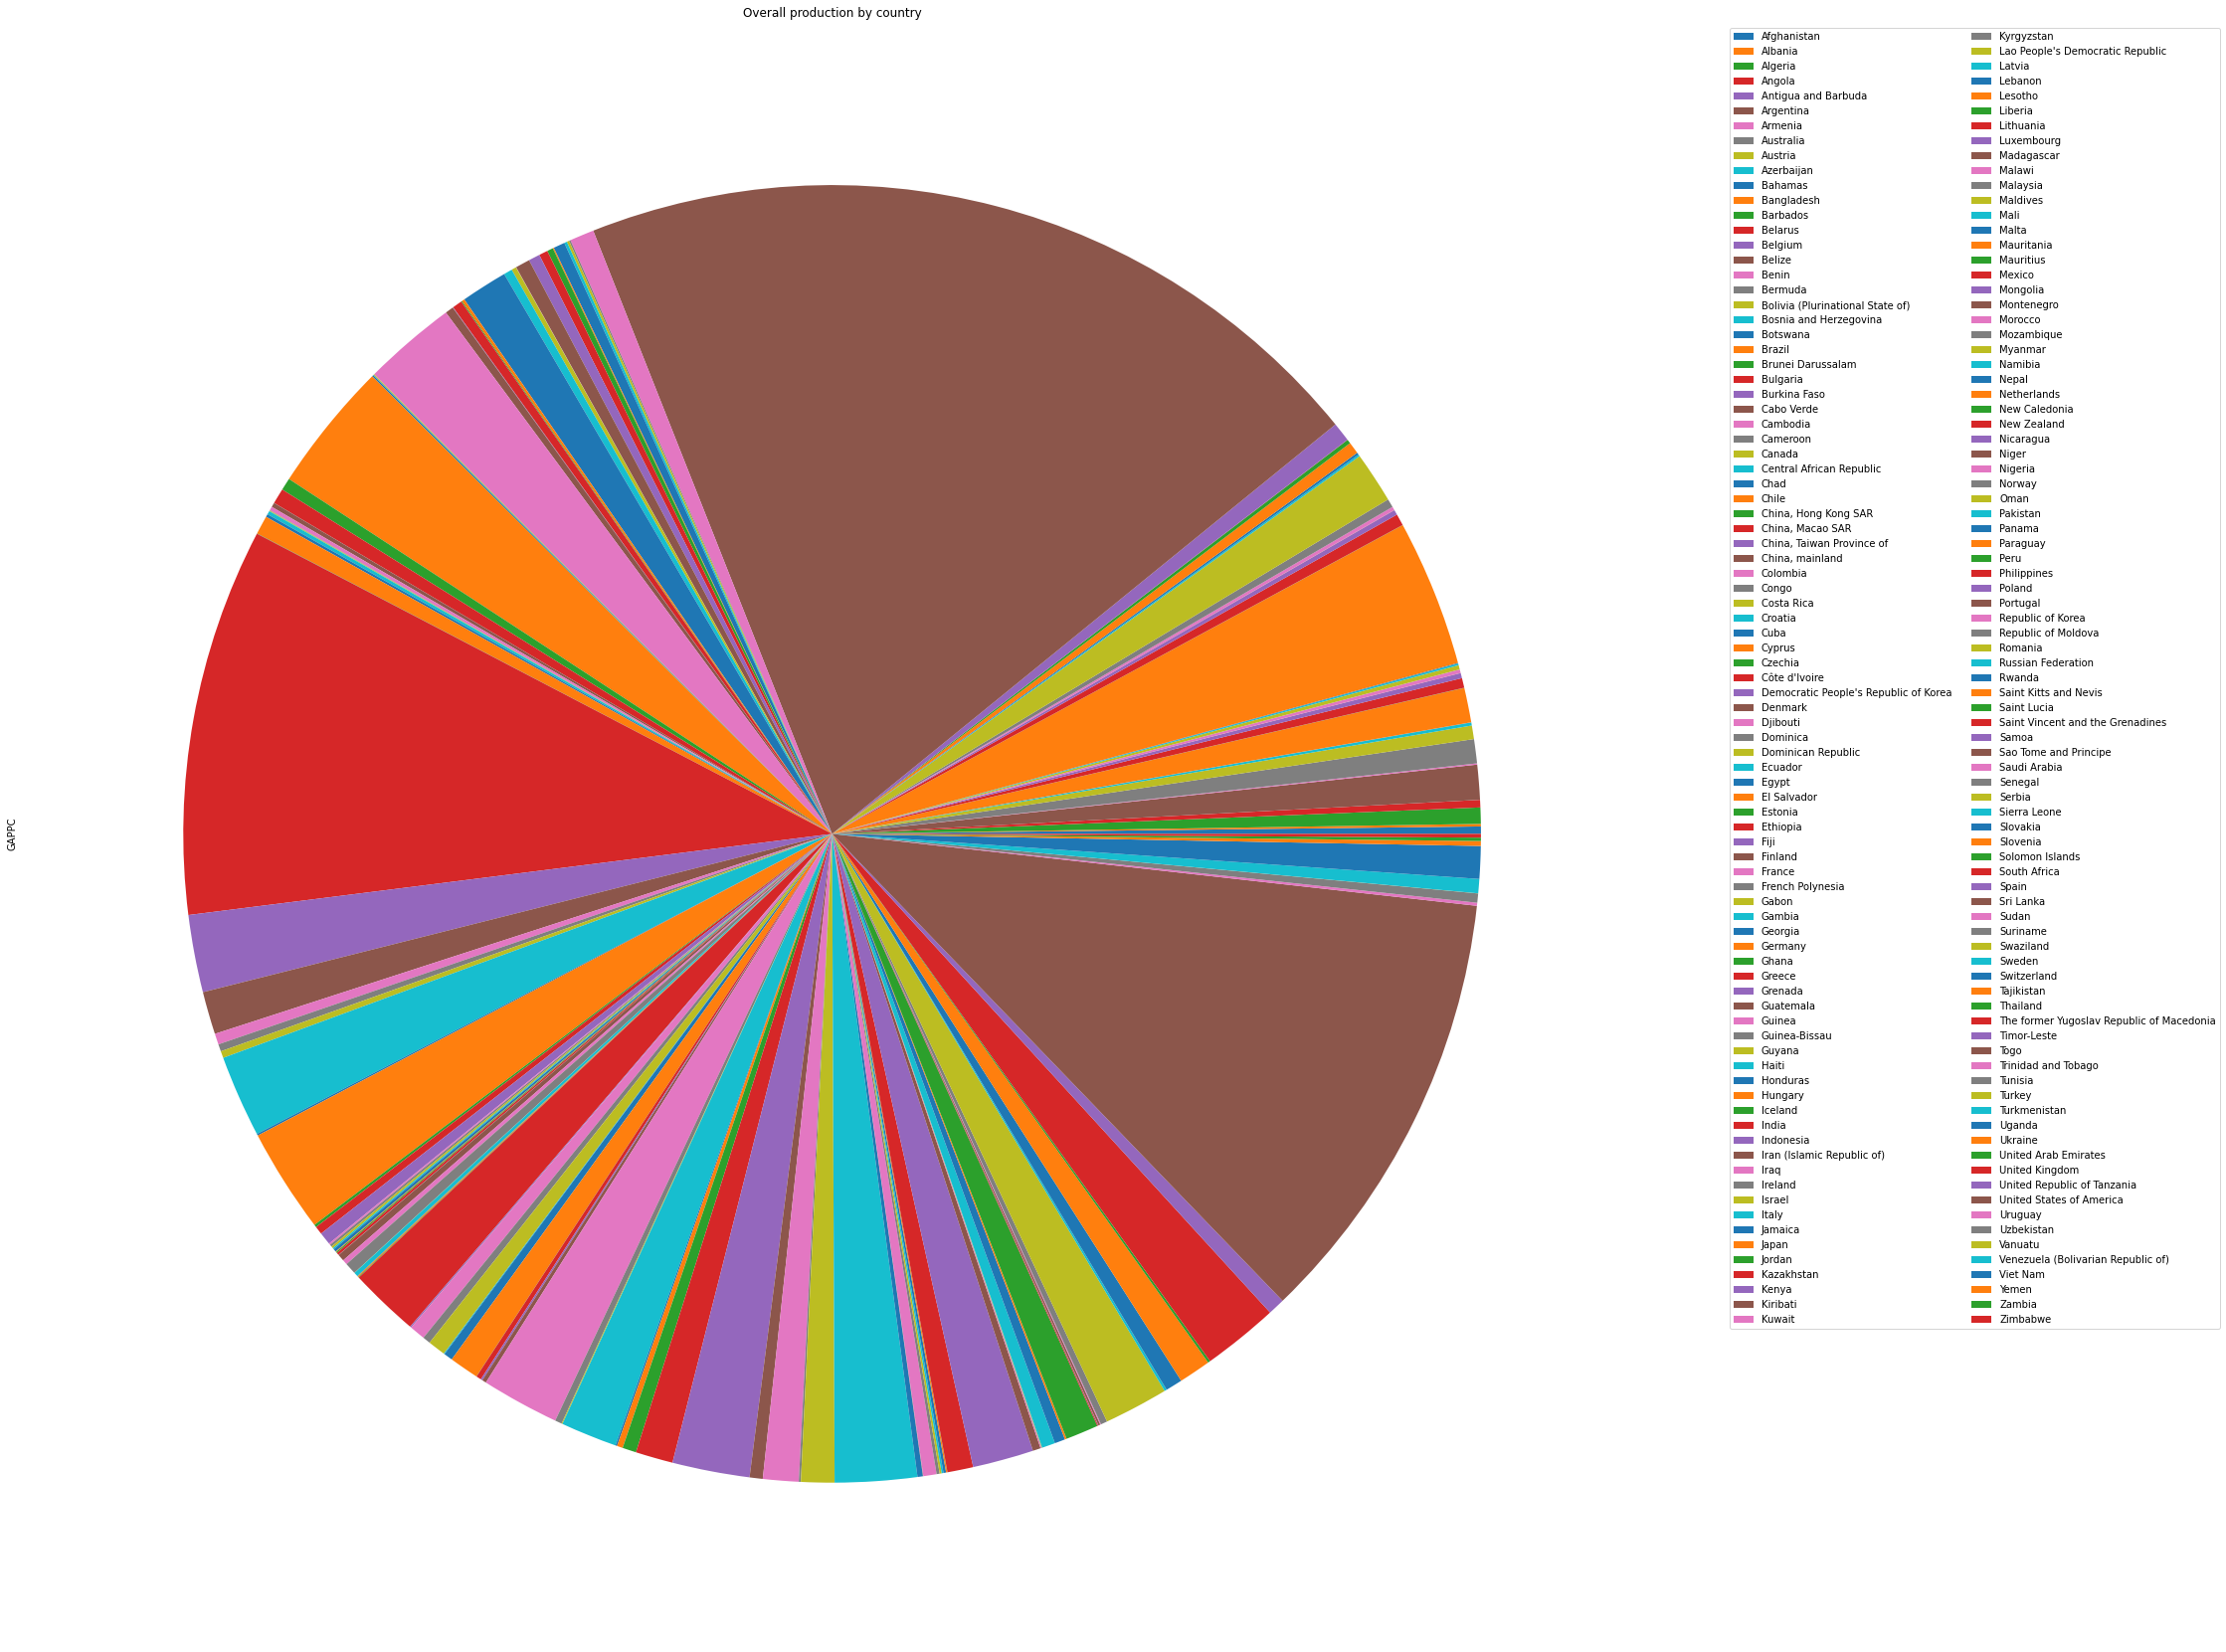

In [9]:
# 3
overall_and_average_and_percentage_food_production['GAPPC'].plot(kind='pie', figsize=(30,30), title='Overall production by country', legend=True,  labeldistance=None)
plt.legend(ncol=2,bbox_to_anchor=(1.05, 1))
plt.show()

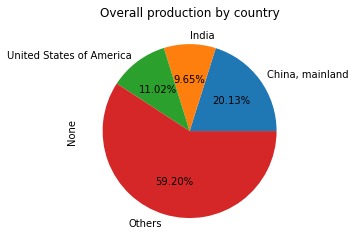

In [10]:
# 4

percentage_food_production_simplified = overall_and_average_and_percentage_food_production['GAPPC'].copy()

sum_less_than_five_percent = percentage_food_production_simplified[percentage_food_production_simplified <= 0.05].sum()
percentage_food_production_simplified =percentage_food_production_simplified[percentage_food_production_simplified > 0.05].append(pd.Series([sum_less_than_five_percent], index=['Others']))

percentage_food_production_simplified.plot(kind='pie', title='Overall production by country', autopct="%.2f%%")
plt.show()

In [63]:
# 5(a)
overall_annual_honey_production_2010_to_2013 = fao[fao['Item']=='Honey'].loc[:,'Y2010':'Y2013']
overall_annual_honey_production_2010_to_2013 = overall_annual_honey_production_2010_to_2013[(overall_annual_honey_production_2010_to_2013 != 0).all(1)]
print(overall_annual_honey_production_2010_to_2013.head(3).append(overall_annual_honey_production_2010_to_2013.tail(3)).to_string())

                                    Y2010  Y2011  Y2012  Y2013
Area                                                          
Afghanistan                           3.0    2.0      2      2
Albania                               3.0    3.0      3      3
Algeria                               6.0    5.0      6      7
Uzbekistan                            3.0    4.0      5      7
Venezuela (Bolivarian Republic of)    1.0    1.0      1      1
Yemen                                 3.0    3.0      3      3


In [64]:
# 5(b)
overall_honey_production_2010_to_2013 = overall_annual_honey_production_2010_to_2013.sum(1).rename('Sum Total')
overall_annual_honey_production_2010_to_2013 = pd.concat([overall_annual_honey_production_2010_to_2013, overall_honey_production_2010_to_2013], axis=1)
overall_annual_honey_production_2010_to_2013.to_csv('overall_annual_honey_production_2010_to_2013.csv')
print(overall_annual_honey_production_2010_to_2013.head(3).append(overall_annual_honey_production_2010_to_2013.tail(3)).to_string())

                                    Y2010  Y2011  Y2012  Y2013  Sum Total
Area                                                                     
Afghanistan                           3.0    2.0      2      2        9.0
Albania                               3.0    3.0      3      3       12.0
Algeria                               6.0    5.0      6      7       24.0
Uzbekistan                            3.0    4.0      5      7       19.0
Venezuela (Bolivarian Republic of)    1.0    1.0      1      1        4.0
Yemen                                 3.0    3.0      3      3       12.0


<AxesSubplot:title={'center':'Overall production by country'}, ylabel='None'>

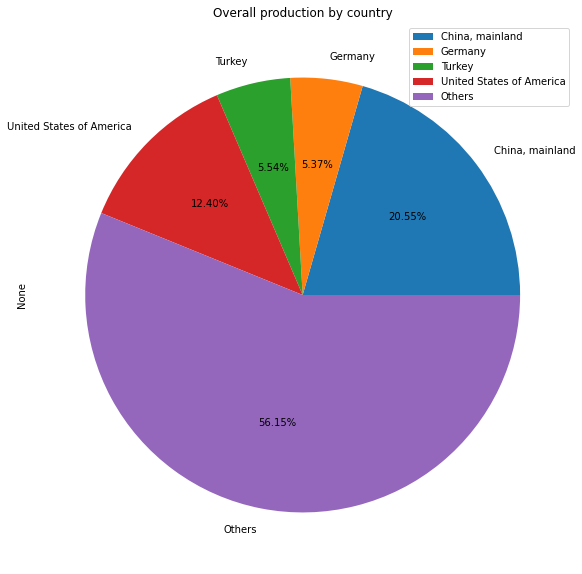

In [68]:
# 5(c)
overall_honey_production_sum_2010_to_2013 = overall_honey_production_2010_to_2013.sum()
percentage_honey_production_2010_to_2013 = overall_honey_production_2010_to_2013/overall_honey_production_sum_2010_to_2013

sum_less_than_five_percent_2010_to_2013 = percentage_honey_production_2010_to_2013[percentage_honey_production_2010_to_2013 <= 0.05].sum()
percentage_honey_production_2010_to_2013 =percentage_honey_production_2010_to_2013[percentage_honey_production_2010_to_2013 > 0.05].append(pd.Series([sum_less_than_five_percent_2010_to_2013], index=['Others']))

percentage_honey_production_2010_to_2013.plot(kind='pie', title='Overall production by country', autopct="%.2f%%",figsize=(10,10), legend=True)
# plt.show()